In [ ]:
import numpy as np
import gym
from tqdm import tqdm
import matplotlib.pyplot as pt

In [ ]:
env = gym.make('Blackjack-v0')

In [ ]:
def generate_one_episode(env, policy, player_sum_min, player_sum_max):
    while True:
        state = env.reset()
        if (state[0]>=player_sum_min) and (state[0]<=player_sum_max):
            break

    episode = []
    
    while True:
        index = (state[0]-player_sum_min, state[1]-1, 0 if state[2] else 1)
        action = np.random.choice(np.arange(policy.shape[-1]), p=policy[index])
        
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state

        if done:
            break
            
    return episode

In [ ]:
def monte_carlo_value_first_visit(env, n_episode, policy, player_sum_min=12, player_sum_max=21, gamma=1):
    returns = np.zeros((player_sum_max-player_sum_min+1, 10, 2))
    counts = np.zeros((player_sum_max-player_sum_min+1, 10, 2))
    for _ in tqdm(range(n_episode)):
        episode = generate_one_episode(env, policy, player_sum_min, player_sum_max)[::-1]
        states = list(np.array(episode)[:, 0])
        G = 0
        for i, (state, action, reward) in enumerate(episode):
            G = gamma*G+reward
            if state not in states[i+1:]:
                index = (state[0]-player_sum_min, state[1]-1, 0 if state[2] else 1)
                returns[index] += G
                counts[index] += 1
    value = returns/counts
    
    return value, counts

In [ ]:
def monte_carlo_value_every_visit(env, n_episode, policy, player_sum_min=12, player_sum_max=21, gamma=1):
    returns = np.zeros((player_sum_max-player_sum_min+1, 10, 2))
    counts = np.zeros((player_sum_max-player_sum_min+1, 10, 2))
    for _ in tqdm(range(n_episode)):
        episode = generate_one_episode(env, policy, player_sum_min, player_sum_max)[::-1]
        states = list(np.array(episode)[:, 0])
        G = 0
        for i, (state, action, reward) in enumerate(episode):
            G = gamma*G+reward
            index = (state[0]-player_sum_min, state[1]-1, 0 if state[2] else 1)
            returns[index] += G
            counts[index] += 1
    value = returns/counts
    
    return value, counts

In [6]:
policy = np.zeros((10, 10, 2, 2), dtype=np.float64)

# if player sum<20 then hit
policy[:-2, :, :, 1] = 1
# if player sum>=20 then stick
policy[-2:, :, :, 0] = 1

In [7]:
value1, counts1 = monte_carlo_value_first_visit(env, 500000, policy)

100%|██████████| 500000/500000 [01:33<00:00, 5332.60it/s]


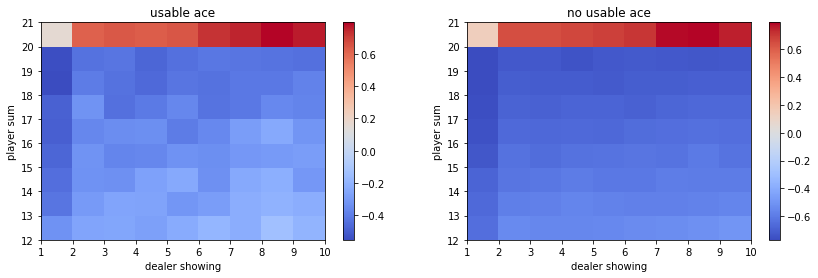

In [8]:
pt.figure(1, figsize=(14, 4))

pt.subplot(1, 2, 1)
pt.title('usable ace')
pt.xlabel('dealer showing')
pt.ylabel('player sum')
pt.pcolor(np.arange(1, 11, 1), np.arange(12, 22, 1), value1[:, :, 0], cmap='coolwarm')
pt.colorbar()

pt.subplot(1, 2, 2)
pt.title('no usable ace')
pt.xlabel('dealer showing')
pt.ylabel('player sum')
pt.pcolor(np.arange(1, 11, 1), np.arange(12, 22, 1), value1[:, :, 1], cmap='coolwarm')
pt.colorbar()


pt.show()

In [10]:
value2, counts2 = monte_carlo_value_every_visit(env, 500000, policy)

100%|██████████| 500000/500000 [01:44<00:00, 4764.97it/s]


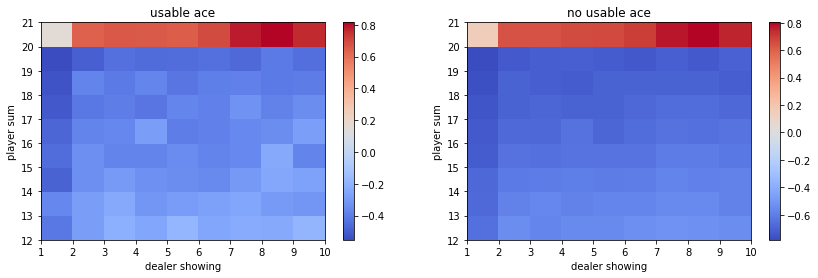

In [11]:
pt.figure(1, figsize=(14, 4))

pt.subplot(1, 2, 1)
pt.title('usable ace')
pt.xlabel('dealer showing')
pt.ylabel('player sum')
pt.pcolor(np.arange(1, 11, 1), np.arange(12, 22, 1), value2[:, :, 0], cmap='coolwarm')
pt.colorbar()

pt.subplot(1, 2, 2)
pt.title('no usable ace')
pt.xlabel('dealer showing')
pt.ylabel('player sum')
pt.pcolor(np.arange(1, 11, 1), np.arange(12, 22, 1), value2[:, :, 1], cmap='coolwarm')
pt.colorbar()

pt.show()